<a href="https://colab.research.google.com/github/raghava0071/ad-targeting-ctr-prediction/blob/main/Raghavendra_Karanam_Ad_Targeting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">
    NSDC Data Science Projects
</h1>
  
<h2 align="center">
    Project: Ad Targeting
</h2>

<h3 align="center">
    Name: (Raghavendra Karanam)
</h3>

**Description:** This project aims to analyze advertising strategies to understand, and potentially improve, engagement. We'll walk through each step of the data science process, from problem definition to insights and data-driven recommendations.



---



### **Please read before you begin your project**

**Instructions: Google Colab Notebooks:**

Google Colab is a free cloud service. It is a hosted Jupyter notebook service that requires no setup to use, while providing free access to computing resources. We will be using Google Colab for this project.

In order to work within the Google Colab Notebook, **please start by clicking on "File" and then "Save a copy in Drive."** This will save a copy of the notebook in your personal Google Drive.

Please rename the file to "Ad Targeting - Your Full Name." Once this project is completed, you will be prompted to share your file with the National Student Data Corps (NSDC) Project Leaders.

You can now start working on the project. :)

We'll be using Google Colab for this assignment. This is a Python Notebook environment built by Google that's free for everyone and comes with a nice UI out of the box. For a comprehensive guide, see Colab's official guide [here](https://colab.research.google.com/github/prites18/NoteNote/blob/master/Welcome_To_Colaboratory.ipynb).

Colab QuickStart:
- Notebooks are made up of cells, cells can be either text or code cells. Click the +code or +text button at the top to create a new cell
- Text cells use a format called [Markdown](https://www.markdownguide.org/getting-started/). Cheatsheet is available [here](https://www.markdownguide.org/cheat-sheet/)
- Python code is run/executed in code cells. You can click the play button at the top left of a code block (sometimes hidden in the square brackets) to run the code in that cell. You an also hit shift+enter to run the cell that is currently selected. There is no concurrency since cells run one at a time but you can queue up multiple cells
- Each cell will run code individually but memory is shared across a notebook Runtime. You can think of a Runtime as a code session where everything you create and execute is temporarily stored. This means variables and functions are available between cells if you execute one cell before the other (physical ordering of cells does not matter). This also means that if you delete or change the name of something and re-execute the cell, the old data might still exist in the background. If things aren't making sense, you can always click Runtime -> restart runtime to start over.
- Runtimes will persist for a short period of time so you are safe if you lose connection or refresh the page but Google will shutdown a runtime after enough time has past. Everything that was printed out will remain on the page even if the runtime is disconnected
- Google's Runtimes come preinstalled with all the core python libraries (math, rand, time, etc) as well as common data analysis libraries (numpy, pandas, scikitlearn, matplotlib). Simply run `import numpy as np` in a code cell to make it available

### **Defining the Problem:**

We need to clearly articulate the problem we're trying to solve with our ad analysis. Our goal is to determine the effectiveness of different ad features in driving engagement.

Understanding the problem is crucial in any data science project. By defining our objective, we can focus our analysis and ensure that our results are relevant and actionable. In this case, we're looking to understand and improve engagement through targeted advertising.

# **Introduction**
---

In this project, we are working with advertising data from a marketing agency to predict whether a user will click on an advertisement. In the current digital age, online advertising is a major driver of revenue for businesses, but understanding user engagement with ads remains a challenge. This project is particularly relevant in the context of digital marketing, where companies aim to optimize their ad strategies to increase engagement and conversion rates. By applying data science techniques, we can uncover patterns in user behavior that help marketers make data-driven decisions.

Throughout the project, participants will engage in several key tasks: data visualization to explore relationships between variables, data preprocessing (such as feature encoding and scaling), and predictive modeling using logistic regression. They will also analyze model performance using metrics like accuracy, precision, recall, and F1-score. The project is designed for individuals with an intermediate understanding of Python, particularly those familiar with libraries like pandas, seaborn, and scikit-learn. By the end of the project, participants will have developed skills in machine learning model development, feature importance analysis, and model evaluation — key competencies for any aspiring data scientist.

This field is an active area of research in both academia and industry. For those interested in further exploration, studies on [`user behavior prediction in digital marketing`](https://www.researchgate.net/publication/335149938_Predicting_Consumer_Behaviour_in_Digital_Market_A_Machine_Learning_Approach) and research articles on [`click-through rate (CTR) prediction model`](https://paperswithcode.com/task/click-through-rate-prediction#papers-list) can provide deeper insights into advanced methodologies used in this domain.



# **Milestone 1: Data Loading and Preprocessing**
---

**Goal:**
Here, we gather the necessary data for our analysis and ensure it's clean and ready for processing.



Link to the dataset: [Effective Targetting of Advertisments](https://www.kaggle.com/datasets/hiimanshuagarwal/advertising-ef)


The data consists of 10 variables:

`'Daily Time Spent on Site'`, `'Age'`, `'Area Income'`, `'Daily Internet Usage'`, `'Ad Topic Line'`, `'City'`, `'Gender'`, `'Country'`, `'Timestamp'` and `'Clicked on Ad'`.

The main variable we are interested in is `'Clicked on Ad'`. This variable can have two possible outcomes: 0 and 1 where 0 refers to the case where a user didn't click the advertisement, while 1 refers to the scenario where a user clicks the advertisement.

### Data Loading
Let's load and look at the dataset to better understand what variables we're working with

In [3]:
# to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# mount google drive to colab in order to load the file from drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
# import the libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Begin by loading the dataset using pandas and display the first few rows to get an initial view of the data.

In [6]:
from google.colab import files
uploaded = files.upload()  # pick advertising_ef.csv from your Downloads folder

import pandas as pd
df = pd.read_csv('advertising_ef.csv')  # use the exact name you uploaded

df.head()

Saving advertising_ef.csv to advertising_ef.csv


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,27-03-2016 00:53,0
1,NaN,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,04-04-2016 01:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,13-03-2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,10-01-2016 02:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,03-06-2016 03:36,0


Use the `info()` method to get a summary of the dataset, including column names, non-null counts, and data types.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1005 non-null   float64
 1   Age                       998 non-null    float64
 2   Area Income               998 non-null    float64
 3   Daily Internet Usage      1005 non-null   float64
 4   Ad Topic Line             1009 non-null   object 
 5   City                      998 non-null    object 
 6   Gender                    1009 non-null   object 
 7   Country                   996 non-null    object 
 8   Timestamp                 1009 non-null   object 
 9   Clicked on Ad             1009 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 79.0+ KB


In [8]:
print("\nColumn Names:", df.columns.tolist())


Column Names: ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Ad Topic Line', 'City', 'Gender', 'Country', 'Timestamp', 'Clicked on Ad']


The `df.info()` method provides crucial information about our dataset:
- We have 1009 entries (rows) in our dataset.
- There are 10 columns, each representing different features of our advertising data.
- The data types include float64 (for numerical data with decimals), int64 (for whole numbers), and object (typically used for text or categorical data).
- We can see that some columns have missing values, as the non-null counts are less than the total number of entries.

**Key observations:**
- `'Daily Time Spent on Site'`, `'Age'`, `'Area Income'`, and `'Daily Internet Usage'` are numerical features.
- `'Ad Topic Line'`, `'City'`, `'Gender'`, `'Country'`, and `'Timestamp'` are categorical or text features.
- `'Clicked on Ad'` is our target variable, represented as an integer (likely 0 for no click and 1 for click).
- There are some missing values in `'Age'`, `'Area Income'`, `'City'`, and `'Country'` columns.

In classification problems, it's important to check if the target variable is balanced. A balanced dataset means that each class (in this case, `'Clicked on Ad' = 1` and `'Clicked on Ad' = 0`) has approximately the same number of instances. If a dataset is imbalanced, it can bias the model toward predicting the majority class more often, which can lead to poor performance on the minority class.

Understanding the structure and content of our dataset is crucial for further analysis and preprocessing steps. It helps us identify potential issues like missing values and guides our feature engineering and model selection processes.

In [9]:
# TODO: checking if we have a balanced dataset
# Code here:

# Count the number of each class (0 = No Click, 1 = Click)
df['Clicked on Ad'].value_counts()


,count
Clicked on Ad,
1,506
0,503


In [10]:
# To see the proportion (%) of each class
df['Clicked on Ad'].value_counts(normalize=True).mul(100).round(2)


,proportion
Clicked on Ad,
1,50.15
0,49.85


### The dataset is balanced, since both classes (0 and 1) have nearly equal representation.
This means the model won’t be biased toward predicting one class more often than the other, which is ideal for classification.

### Handle Missing Values

**Why Check For Missing Values?**

- Identifying missing values is a crucial step in data preprocessing. Missing data can significantly impact our analysis and model performance.
- It gives us an idea of the overall quality of our dataset.
- Columns with missing values might be less reliable for our analysis.
- Knowing which columns have missing values helps us decide on appropriate strategies for handling them. For example:
  - For numerical columns like `'Daily Time Spent on Site'` or `'Age'`, we might consider imputing with mean or median values.
  - For categorical columns like `'City'` or `'Country'`, we might create a new category for missing values or use the most frequent value.

- If certain columns have more missing values than others, it could introduce bias into our analysis. We need to consider why these values are missing and if it's related to our target variable (`'Clicked on Ad'`)

Learn about central tendency in detail [here](https://www.youtube.com/watch?v=RHI110MHUCc&list=PLNs9ZO9jGtUDxKBBZa5ImsV9h9hlLwJWH&index=35&pp=gAQBiAQB).

Use the `isna()` method combined with `sum()` to count the number of missing values in each column.

In [11]:
# Calculate the number of missing values for each column
missing_values = df.isna().sum()

print("Number of missing values per column:\n", missing_values)

Number of missing values per column:
 Daily Time Spent on Site     4
Age                         11
Area Income                 11
Daily Internet Usage         4
Ad Topic Line                0
City                        11
Gender                       0
Country                     13
Timestamp                    0
Clicked on Ad                0
dtype: int64




---



Now, let's vizualize the missing values per column as a bar graph. Learn about bar graphs [here](https://www.google.com/url?q=https://www.youtube.com/watch?v%3DY_HCxHOy4Sw%26list%3DPLNs9ZO9jGtUDxKBBZa5ImsV9h9hlLwJWH%26index%3D28%26pp%3DgAQBiAQB&sa=D&source=editors&ust=1733322841503749&usg=AOvVaw01PlFyaksZP69knXmIc-fI).

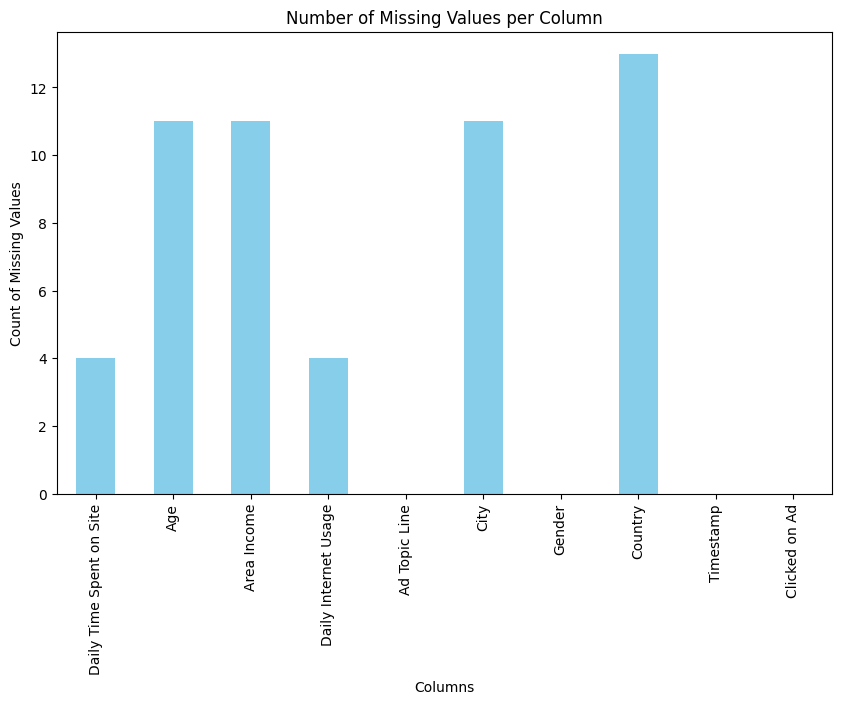

In [12]:
# Plot the missing values as a bar chart
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Number of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=90)
plt.show()


**Insights:**
- The missing values are relatively small compared to the total dataset size (1009 rows), so we can likely handle them without losing significant information.
- We will need to decide whether to impute these values or drop rows/columns depending on the importance of these features for our analysis.
In the next step, we will explore strategies for handling these missing values, such as imputation or removal.

The following bar graph is almost similar to the one above but it includes the values corresponding to the columns. Which one would you prefer and why?

> *  Answer here: I’d prefer the bar graph that includes the value labels because it’s much easier to read and interpret.

Since our dataset only has 10 columns, adding the exact missing value counts (like Age = 11, Country = 13, etc.) doesn’t make the chart cluttered — instead, it makes it clearer which columns need attention. You can immediately see that Age, Area Income, City, and Country have the most missing values, while others like Gender, Ad Topic Line, and Clicked on Ad have none.

Also, because the number of missing values is relatively small compared to the total of 1009 rows, having the counts visible helps confirm that we can handle these gaps easily through imputation instead of removing large portions of data.

Overall, the labeled version makes the visualization more informative and presentation-ready, showing both the size and the exact number of missing values at a glance.

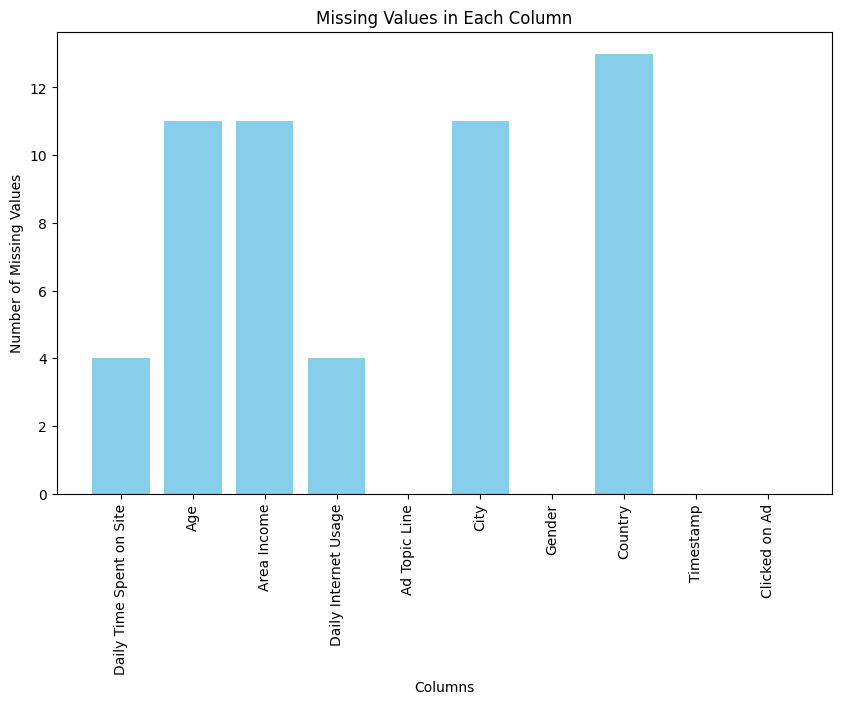

In [13]:
# Plot the missing values as a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(missing_values.index, missing_values.values, color='skyblue')

# Add text annotations on top of each bar
# TODO: code here

plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.show()

**Strategy for Handling the Missing Values**

Dropping the rows with missing values is not ideal in this case because we do not have enough data. Dropping those rows would lead to a significant loss in information. Instead, we use the following ways to keep that information while dealing with missing values:

- **Numerical Columns:** Imputing with the mean - it ensures that we retain all rows while maintaining the overall distribution of the data.
- **Categorical Columns:** Filling with 'Unknown' allows us to keep information about rows where location data (`'City'` or `'Country'`) was missing, which could be useful for analysis or modeling.


In [14]:
# Fill missing values with mean for numerical columns
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Area Income'].fillna(df['Area Income'].mean(), inplace=True)
df['Daily Time Spent on Site'].fillna(df['Daily Time Spent on Site'].mean(), inplace=True)
df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].mean(), inplace=True)

# Fill missing values in categorical columns with 'Unknown'
df['City'].fillna('Unknown', inplace=True)
df['Country'].fillna('Unknown', inplace=True)

# Check again to ensure no missing values remain
print("Missing values after filling:\n", df.isna().sum())


Missing values after filling:
 Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64


After filling in the missing values, check again to ensure that there are no remaining missing values.

In [15]:
missing_after = df.isna().sum()
missing_after[missing_after > 0]

,0


In [16]:
assert df.isna().sum().sum() == 0, "There are still missing values!"
print("All good — no missing values remain.")

All good — no missing values remain.


<Axes: title={'center': 'Missing Values After Imputation'}>

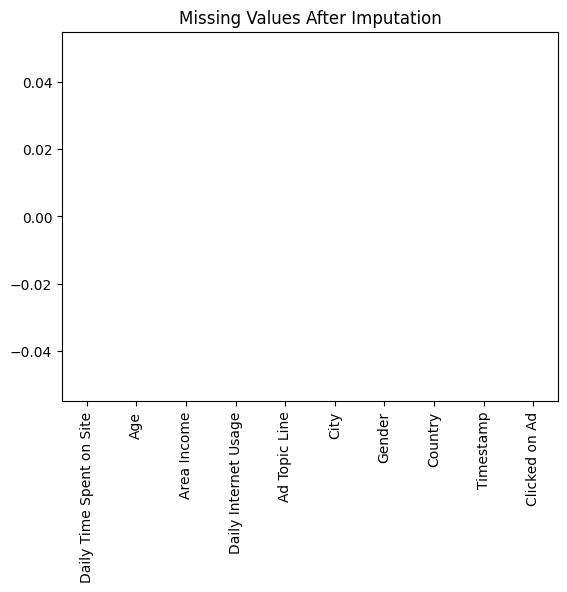

In [17]:
(df.isna().sum()
   .plot(kind='bar', title='Missing Values After Imputation'))

### Cleaning the dataset

Looking at the data, we can see that we need to convert the `Timestamp` column into a more usable format and extract additional features such as `Hour`, `Day`, and `Month`.

- The first step is to convert the `Timestamp` column from a `string` format to a proper `datetime` format using `pd.to_datetime()`.
- After converting the `Timestamp` column to `datetime`, we can extract the desired features.

In [18]:
# Convert 'Timestamp' to datetime (day-first in this dataset)
df['Timestamp'] = pd.to_datetime(df['Timestamp'], dayfirst=True, errors='coerce')

# Extract additional features from 'Timestamp'
df['Hour']  = df['Timestamp'].dt.hour
df['Day']   = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month

# print head to see the new features
df.head()


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad,Hour,Day,Month
0,68.950000,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,2016-03-27 00:53:00,0,0,27,3
1,65.009463,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,2016-04-04 01:39:00,0,1,4,4
2,69.470000,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,2016-03-13 20:35:00,0,20,13,3
3,74.150000,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,2016-01-10 02:31:00,0,2,10,1
4,68.370000,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,2016-06-03 03:36:00,0,3,3,6


With this step completed, our dataset is now clean and ready for further analysis!

# **Milestone 2: Exploratory Data Visualization**
---

It's time to explore the data visually. Visualizing the data helps us understand patterns, distributions, and relationships between variables. Here is a [data vizualization resource](https://www.youtube.com/playlist?list=PLNs9ZO9jGtUCZ0pzj1OcFN450-COhaWkw).

### Age Distribution Histogram
Plot a histogram of the `'Age'` column to understand its distribution.


This visualization is a histogram of the `'Age'` column, which shows how age is distributed across our dataset. Use the `sns.histplot()` function from Seaborn here, with `bins=20` to divide the age range into 20 intervals, and `kde=True` to overlay a Kernel Density Estimate (KDE) curve that smooths out the distribution. Learn more about KDE [here](https://www.geeksforgeeks.org/kde-plot-visualization-with-pandas-and-seaborn/).

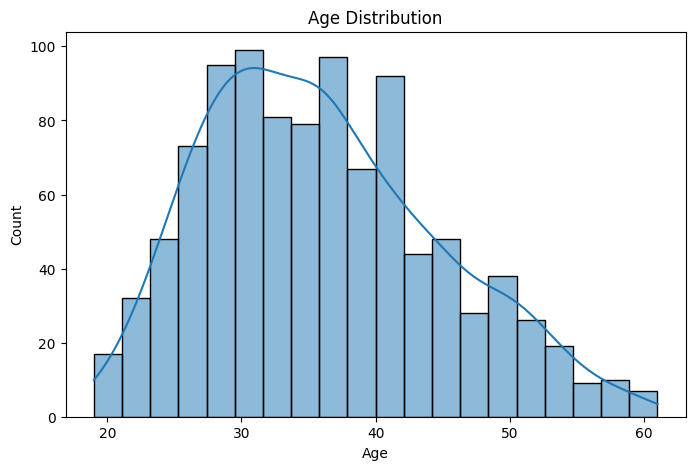

In [19]:
# Age Distribution Histogram
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

__TODO__: Write your key insights from the above distribution
<br>
**Key Insights:**
> Most users cluster around the late-20s to mid-30s. There’s still a decent tail into the 40s–50s, which matters since older users showed higher click propensity in our model.  
   

These insights can help us understand which age groups are most represented in our dataset, which could be important when analyzing ad engagement.

### Age vs. Clicked on Ad
Use a box plot to visualize how age relates to whether a user clicked on an ad or not. Use `sns.boxplot()`

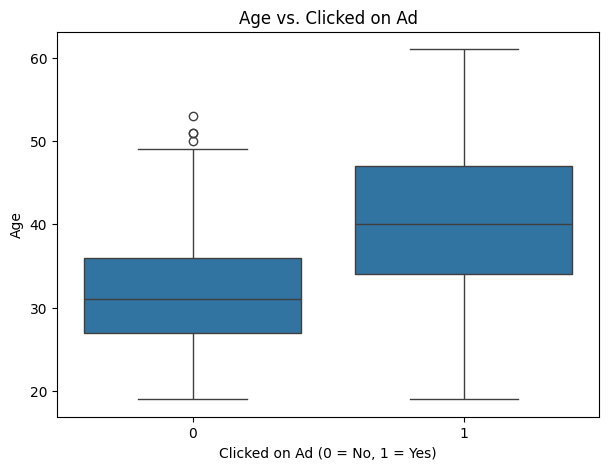

In [20]:
# Age vs. Clicked on Ad
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='Clicked on Ad', y='Age')
plt.title('Age vs. Clicked on Ad')
plt.xlabel('Clicked on Ad (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

The box plot above compares the age distribution between those who clicked on ads and those who didn't.

**TO DO:** What differences do you observe? Could age be a factor in ad engagement?

> * Answer here:  The “1 = clicked” group is older on average with a higher median age. So yes—age appears to be a factor in ad engagement.

Now do the same for Area Income. Create a boxplot for Area Income vs Clicked on Ad

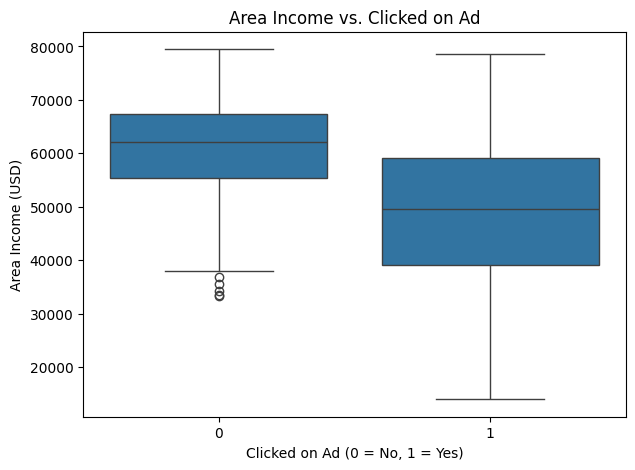

In [21]:
# Area Income vs. Clicked on Ad
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='Clicked on Ad', y='Area Income')
plt.title('Area Income vs. Clicked on Ad')
plt.xlabel('Clicked on Ad (0 = No, 1 = Yes)')
plt.ylabel('Area Income (USD)')
plt.show()


**TO DO:** What insights do you get from these boxplots and how does it potentially affect the ad targetting decisions?

>* Answer here: Clickers tend to come from lower area income regions relative to non-clickers. For targeting, lean on contextual/time signals rather than raw demographics; consider value-focused messaging for segments with lower income.

### Violin Plot for Age and Clicked on Ad
Create a violin plot to visualize the distribution of age for users who clicked on ads versus those who did not. Use `sns.violinplot()`.

The violin plot provides a more detailed view of the distribution of the `'Age'` variable for each category of `'Clicked on Ad'` (`0` = did not click, `1` = clicked). <br><br>
Learn more about violin plots [here](https://www.geeksforgeeks.org/violinplot-using-seaborn-in-python/).

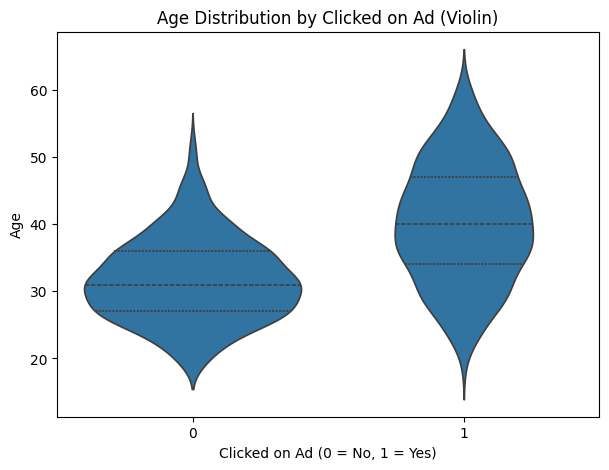

In [22]:
# Violin Plot for Age and Clicked on Ad
plt.figure(figsize=(7, 5))
sns.violinplot(data=df, x='Clicked on Ad', y='Age', inner='quart')
plt.title('Age Distribution by Clicked on Ad (Violin)')
plt.xlabel('Clicked on Ad (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()



The violin plot provides a detailed view of the age distribution for each group.

**TO DO:** Do you notice any interesting or repeating patterns or outliers?
> * Answer here: The “clicked” group skews older with a tighter middle band; a few younger outliers still click.

**TO DO:** Is violin plot more or less detailed than boxplot? Explain.

> * Answer here: The violin is more detailed: it shows the full density shape, not just quartiles. Boxplots are simpler; violins reveal multi-modal patterns if they exist.


### Average Daily Time Spent on Site by Clicked on Ad
Create a bar plot to show the average daily time spent on the site for users who clicked on an ad (1) versus those who did not (0).

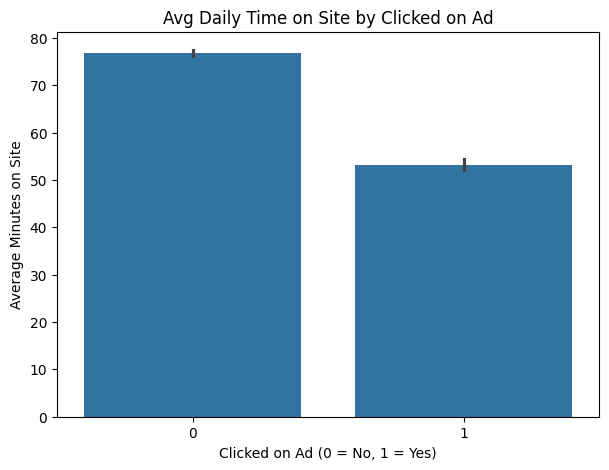

In [23]:
# Average Daily Time Spent on Site by Clicked on Ad
plt.figure(figsize=(7, 5))
sns.barplot(data=df, x='Clicked on Ad', y='Daily Time Spent on Site', estimator=np.mean, ci=95)
plt.title('Avg Daily Time on Site by Clicked on Ad')
plt.xlabel('Clicked on Ad (0 = No, 1 = Yes)')
plt.ylabel('Average Minutes on Site')
plt.show()


**TO DO:** <br>
> *  key insights:
Non-clickers spend more time on site on average (banner fatigue / content focus). Clickers tend to be quicker sessions.

### Stacked Bar Chart of Clicked on Ad by County

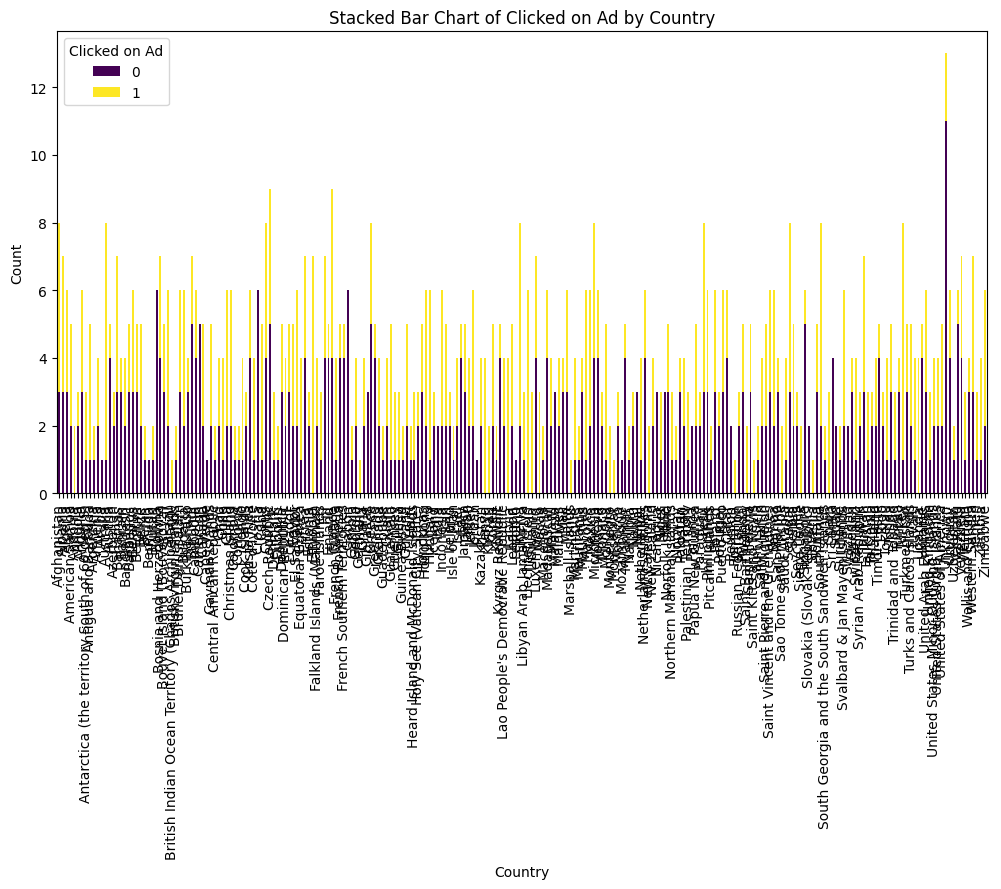

In [24]:
# Stacked Bar Chart of Clicked on Ad by County
# This chart shows the count of ad clicks by city.

city_counts = df.groupby(['Country', 'Clicked on Ad']).size().unstack(fill_value=0)
city_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Stacked Bar Chart of Clicked on Ad by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

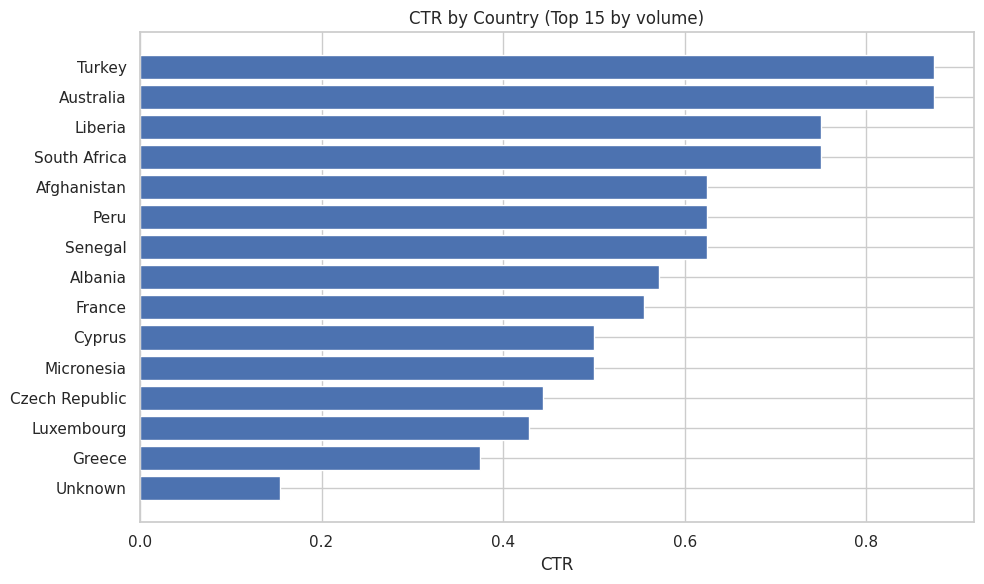

In [47]:
# CTR bar: mean click rate by country (top-N by volume)
ctr = df.groupby('Country')['Clicked on Ad'].agg(['mean','size'])
ctr_top = ctr.sort_values('size', ascending=False).head(topN).sort_values('mean', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(ctr_top.index, ctr_top['mean'])
plt.gca().invert_yaxis()
plt.title(f'CTR by Country (Top {topN} by volume)')
plt.xlabel('CTR')
plt.tight_layout()
plt.show()


**Description:** This stacked bar chart shows the distribution of ad clicks (1 = clicked, 0 = not clicked) across different countries. Each bar represents a country, and the segments within the bars represent the count of users who clicked or did not click on an ad.

**Key Insights:**
- Ad engagement varies across countries, with some countries showing higher proportions of clicks (yellow segments) compared to others.
- The United States has a significantly higher number of users, with both clicked and non-clicked ads being prominent.
- However, the **x-axis labels are crowded, making it difficult to read** individual country names. You may want to rotate the labels or filter out countries with fewer data points for better clarity.

**TO DO:** How would you go about making it a presentable and useful graph?

> * Answer here:

In [25]:
# OPTIONAL TODO: Recreate the graph here to make it more useful!
# Code here:


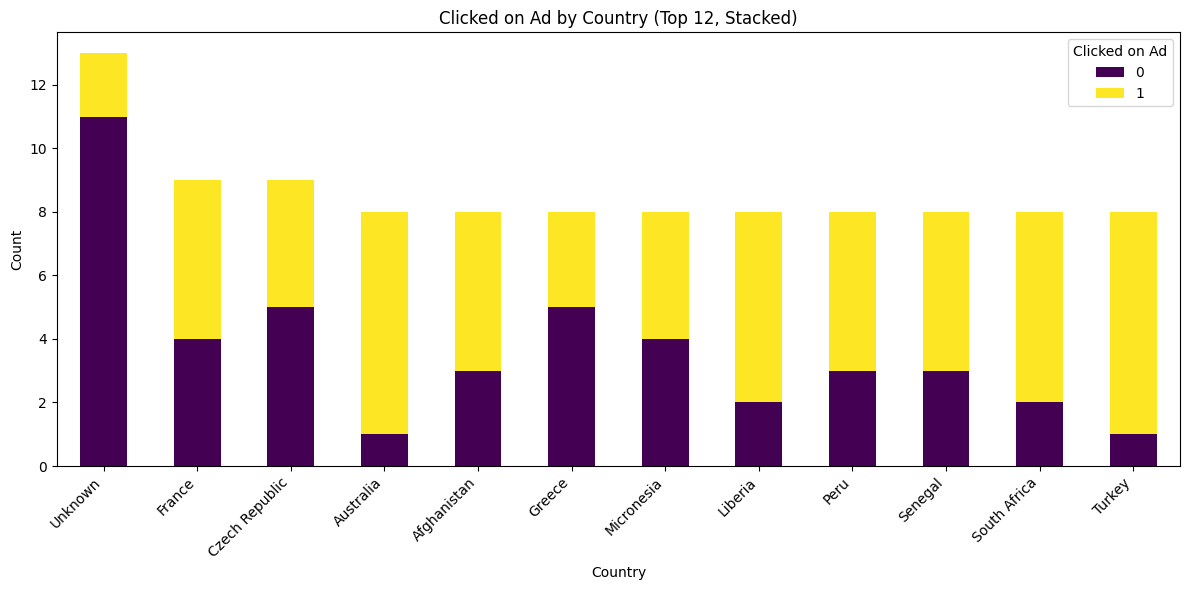

In [26]:
# OPTIONAL: Top 12 countries stacked
topN = 12
cts = df['Country'].value_counts().nlargest(topN).index
city_counts = (df[df['Country'].isin(cts)]
               .groupby(['Country','Clicked on Ad'])
               .size().unstack(fill_value=0))
city_counts = city_counts.loc[city_counts.sum(axis=1).sort_values(ascending=False).index]

city_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Clicked on Ad by Country (Top 12, Stacked)')
plt.xlabel('Country'); plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Faceted Histogram of Age by Clicked on Ad

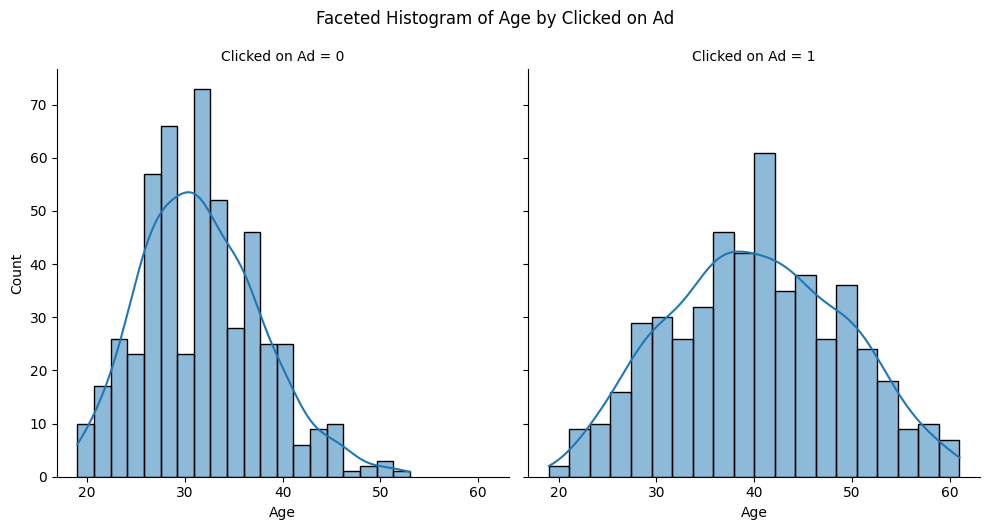

In [27]:
# Faceted Histogram of Age by Clicked on Ad
# Faceted histograms allow you to compare distributions across different subsets of data.

# To identify potential bias in the 'Age' column of your dataset:

g = sns.FacetGrid(df, col="Clicked on Ad", height=5, aspect=1)
g.map(sns.histplot, "Age", bins=20, kde=True)
g.set_axis_labels("Age", "Count")
g.set_titles("Clicked on Ad = {col_name}")
g.fig.suptitle('Faceted Histogram of Age by Clicked on Ad', y=1.05)
plt.show()

**Description:** <br>
This faceted histogram shows the distribution of age for users who clicked on an ad (right) versus those who did not (left), with a KDE curve overlay.

**TO DO:**
>* Share your key insights here: Both groups have a 20s–30s core, but clickers skew older, matching the box/violin observations.

Do the same Faceted Histogram of `'Area Income'` by `'Clicked on Ad'`.

### Correlation Matrix

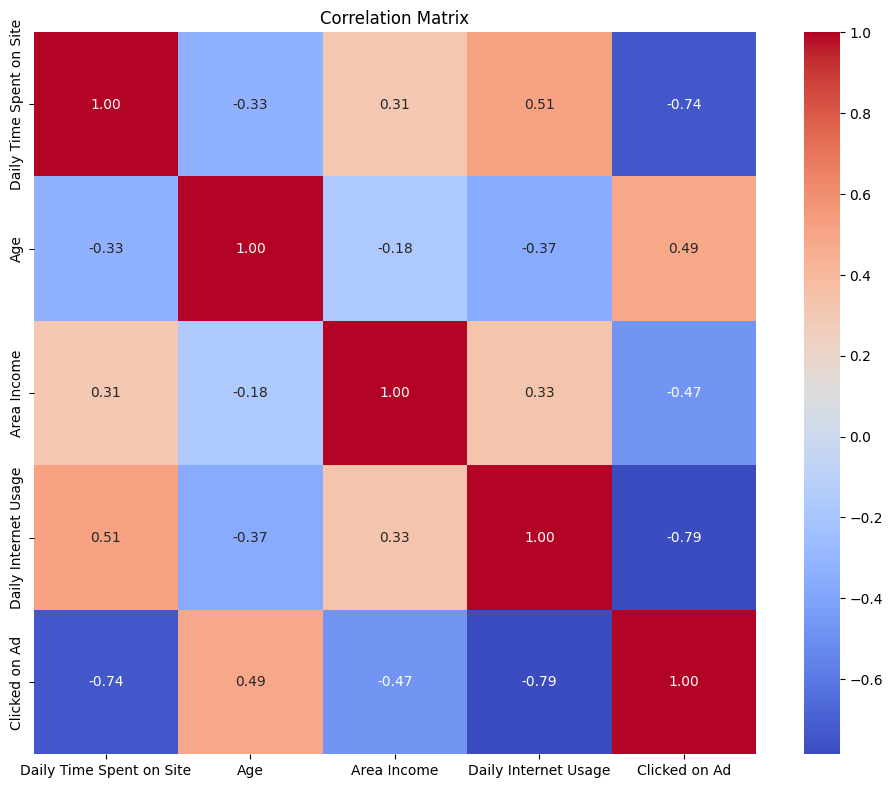

In [28]:
# Correlation Matrix
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

plt.figure(figsize=(10, 8))
correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


**Description:**  <br>
This heatmap shows the correlation between numerical variables in the dataset, with values ranging from -1 to 1. Positive correlations are shown in red, and negative correlations are shown in blue.

**TO DO:** Share 2 key insights here:
> *  Daily Internet Usage and Daily Time Spent on Site are strongly negatively correlated with clicks.

> * Age is positively correlated with clicks; Area Income is negatively correlated.


### Distribution of Daily Internet Usage by Country

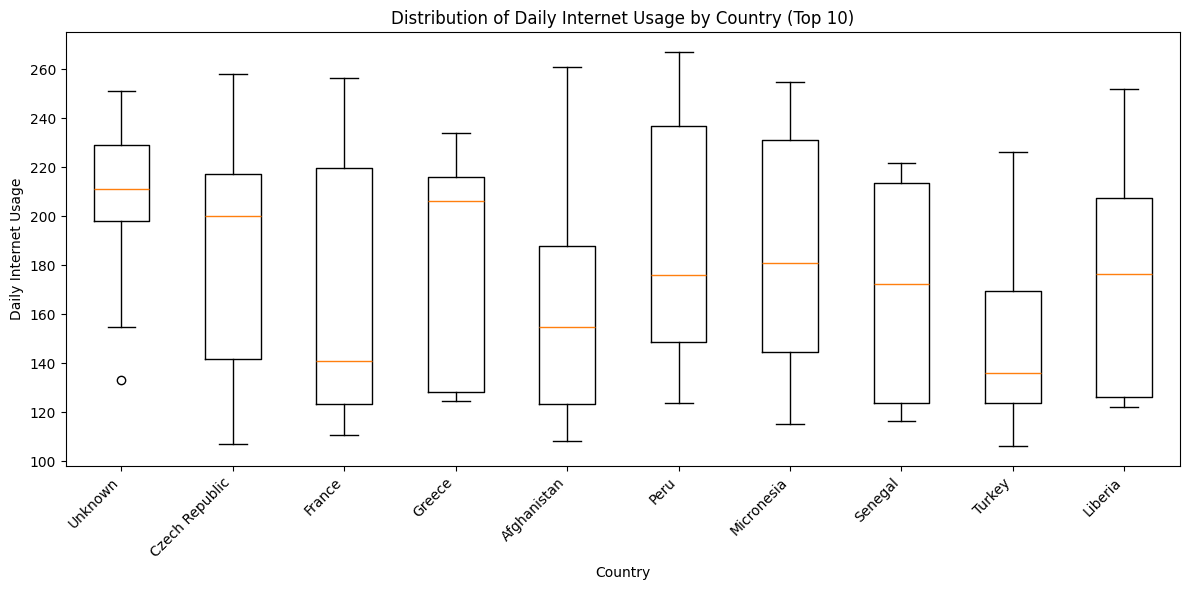

In [29]:
# Distribution of Daily Internet Usage by Country
top_countries = df['Country'].value_counts().nlargest(10).index

plt.figure(figsize=(12, 6))
plt.boxplot([df[df['Country'] == c]['Daily Internet Usage'] for c in top_countries], labels=top_countries)
plt.xlabel('Country'); plt.ylabel('Daily Internet Usage')
plt.title('Distribution of Daily Internet Usage by Country (Top 10)')
_ = plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Description:** <br>
The box plot shows the distribution of daily internet usage across the top 10 countries with the most data entries in the dataset. Each box represents a country, and the distribution of daily internet usage is visualized through the median (orange line), quartiles, and potential outliers.

**Which ones of these insights do you agree with?:**
- Countries like Afghanistan and Turkey have a narrower range of daily internet usage, indicating less variation among users in these countries.
- Countries like Peru and France have a wider range, with some users having significantly higher daily internet usage.
- There are a few outliers in countries like Australia and Czech Republic, where some users have notably lower or higher internet usage compared to the majority.

**TO DO:**
> *  Write your answer here and explain why.
> * “Afghanistan and Turkey have a narrower range”  The boxes/whiskers for these are tighter → less variability.

> * “Peru and France have a wider range”  Wider boxes/longer whiskers → more variability.

> * “There are outliers in Australia/Czech Republic”  Points beyond whiskers confirm outliers.

### Historgram for numerical features

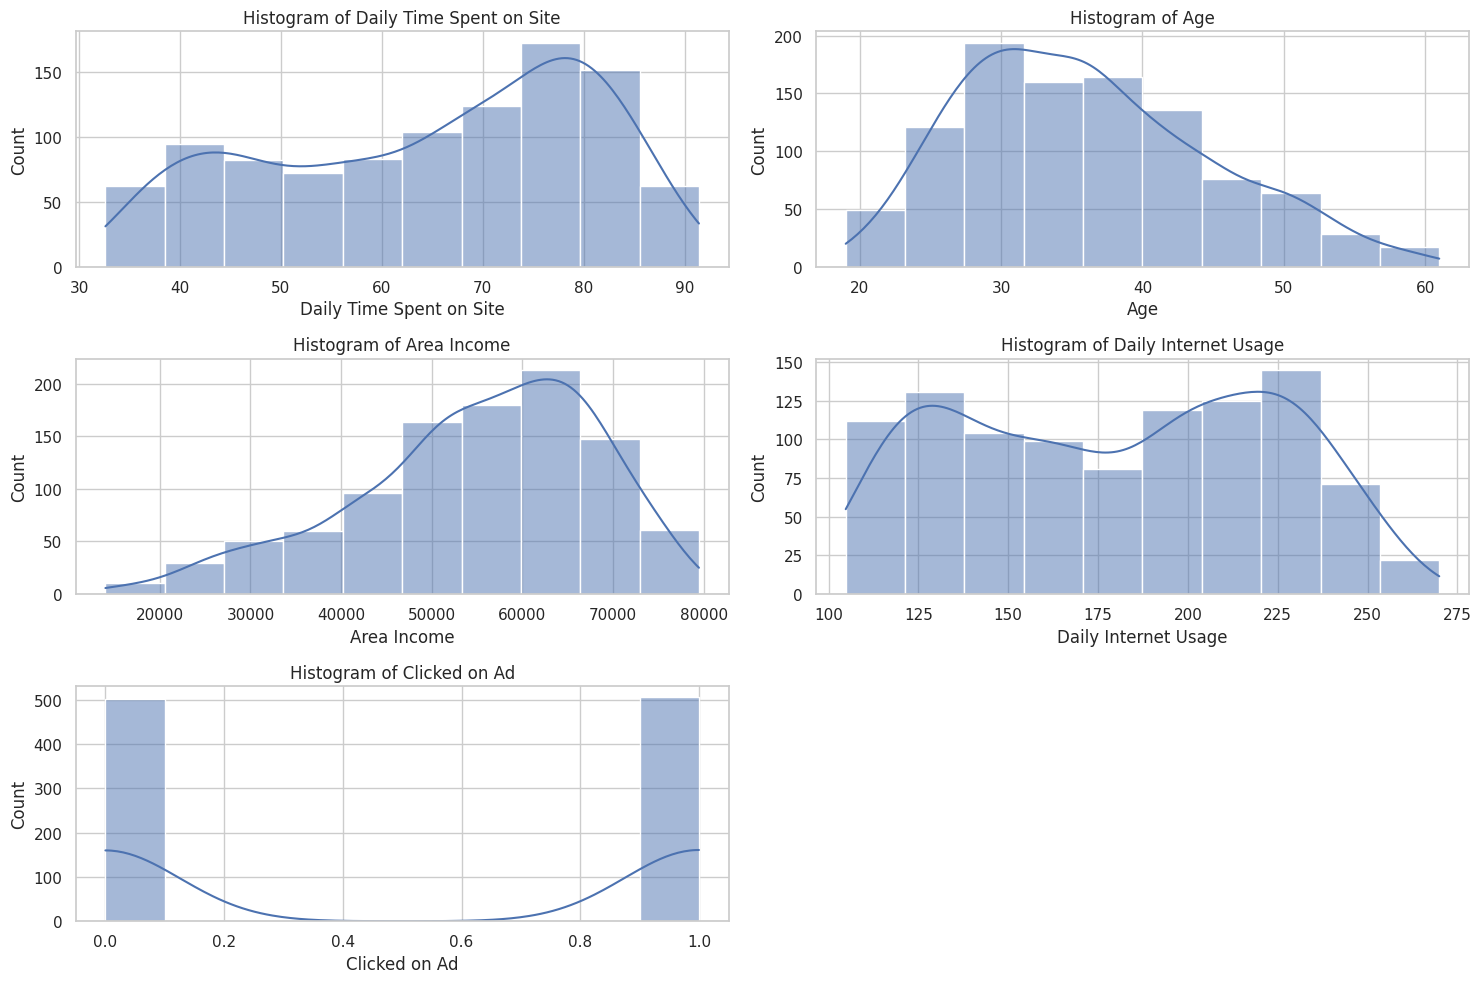

In [30]:
# Histograms for numerical features
sns.set(style="whitegrid")
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, start=1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col].dropna(), bins=10, kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()


**Description:** <br>
These histograms display the distributions of various numerical features in the dataset, such as `'Daily Time Spent on Site'`, `'Age'`, `'Area Income'`, `'Daily Internet Usage'`, and `'Clicked on Ad'`. The KDE (Kernel Density Estimate) curves overlay the histograms to provide a smoother view of the distributions. Learn about skewness in histograms [here](https://www.geeksforgeeks.org/skewness-measures-and-interpretation/).

**TODO:** Fill in the following blanks:

- **Daily Time Spent on Site:** The distribution is slightly `right`-skewed, with most users spending between `60` to `80` minutes on the site.
- **Age:** The age distribution is `slightly right`-skewed, with most users falling between `$25` to `$40` years old.
- **Area Income:** The income distribution is bell-shaped, with most users earning between USD `$40k` and USD `$75k` annually.
- **Daily Internet Usage:** This feature shows a `bi-modal tendency` distribution, with peaks around 125 minutes and 225 minutes.
- **Clicked on Ad:** This is a binary variable, with almost equal counts for 0 (did not click) and 1 (clicked), confirming that the dataset is `balanced`.


### Daily Time Spent on Site vs. Daily Internet Usage

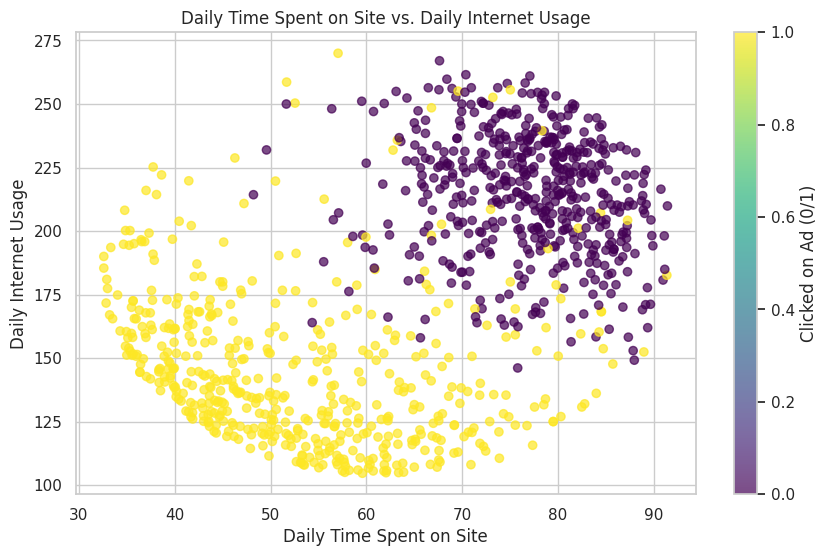

In [31]:
# Daily Time Spent on Site vs. Daily Internet Usage
plt.figure(figsize=(10, 6))
plt.scatter(x=df['Daily Time Spent on Site'],
            y=df['Daily Internet Usage'],
            c=df['Clicked on Ad'], cmap='viridis', alpha=0.7)
plt.xlabel('Daily Time Spent on Site')
plt.ylabel('Daily Internet Usage')
plt.title('Daily Time Spent on Site vs. Daily Internet Usage')
_ = plt.colorbar(label='Clicked on Ad (0/1)')
plt.show()


**Description:** <br>
This scatter plot visualizes the relationship between `Daily Time Spent on Site` and `Daily Internet Usage`, with points color-coded based on whether the user clicked on an ad (0 = did not click, 1 = clicked).

**TO DO:** Write your key insights below.
> *  There’s a negative relationship: heavy internet users / longer on-site time tend to not click. Many clicks occur in the lower-usage / lower time region.
   

**TO DO:** Give one or more actionable insights from the above visualization
> *  For heavy-usage cohorts, use native/less intrusive placements with a single strong CTA.

> * Daypart delivery toward windows where click propensity is higher (from your time features).

> * Consider frequency caps or creative rotation to combat banner fatigue.
   
   

# **Milestone 3: Predictive Modeling**
---
In this step, we will
- encode categorical variables
- select relevant features
- split the data into train/test
- scale the data
- train and test the model
- evaluate the model performance.


In [32]:
# import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Copy, Select, Split & Scale

Before proceeding with any transformations, it's a good practice to create a copy of the original dataset, using `df.copy()`. This ensures that any changes (like one-hot encoding or feature extraction) won't affect the original data.

In [35]:
# creating a copy of the dataset so we don't change the original df structure in one-hot-encoding process
# creating a copy of the dataset so we don't change the original df structure in one-hot-encoding process
df2 = df.copy()

Categorical variables such as `'City'` and `'Country'` need to be converted into numerical representations for machine learning models. We use one-hot encoding to achieve this, which creates binary columns for each category. Learn more about One-Hot Encoding [here](https://www.geeksforgeeks.org/ml-one-hot-encoding/).

This process converts each unique value in a categorical column into a new binary column. For example, if there are three cities (New York, Los Angeles, Chicago), three new columns will be created (City_New York, City_Los Angeles, City_Chicago), with 1 indicating the presence of that city and 0 otherwise.

`drop_first=True`: This argument prevents multicollinearity by dropping one category from each set of dummy variables.

In [ ]:
# Encode categorical variables

# TODO
df2 = pd.get_dummies(df2, columns=['__column1__', '__column2__'], drop_first= ___)

Next, we **select the features** that will be used in our predictive model.

And finally, we prepare the feature matrix **`X`** and target vector **`y`**.

In [36]:
# Encode categorical variables (one-hot)
# We'll encode 'City' and 'Country' as requested. If 'Gender' or 'Ad Topic Line' are needed, add them to the list.
df2 = pd.get_dummies(df2, columns=['City', 'Country'], drop_first=True)


**Splitting the data:** <br>
We use `train_test_split()` from the `sklearn.model_selection` module to split the data into training and testing sets. The `test_size` parameter should be set to `0.2`, meaning 20% of the data will be used for testing, while 80% will be used for training. A `random_state` is set to ensure reproducibility.

In [37]:
# Select features for modeling
# NOTE: use df2 (the encoded frame) when collecting dummy columns
features = [
    'Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage',
    'Hour', 'Day', 'Month'
] + [col for col in df2.columns if col.startswith(('City_', 'Country_'))]

X = df2[features]
y = df2['Clicked on Ad']

In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


**Scaling the data:** <br>
Next, we scale the features using `StandardScaler` from `sklearn.preprocessing`. Standardization rescales the data so that each feature has a mean of `0` and a standard deviation of `1`. This is particularly important when using models that rely on distance metrics (e.g., logistic regression, k-nearest neighbors).

Learn more about standardization [here](https://www.geeksforgeeks.org/what-is-standardization-in-machine-learning/).

In [39]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

Now our data is ready for training and testing.

### Train and Test

Now, we use the `LogisticRegression` model to fit on our train data, and then make predictions on the test data using `model.predict`.

In [40]:
# Logistic Regression Model
# Train
lr_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
lr_model.fit(X_train_scaled, y_train)

# Predict
y_pred = lr_model.predict(X_test_scaled)

### Evaluation

In [41]:
# Accuracy
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))

Accuracy: 0.931


In [42]:
# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[99  2]
 [12 89]]


In [43]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, digits=3))

Classification Report:
               precision    recall  f1-score   support

           0      0.892     0.980     0.934       101
           1      0.978     0.881     0.927       101

    accuracy                          0.931       202
   macro avg      0.935     0.931     0.931       202
weighted avg      0.935     0.931     0.931       202



**Reading the Evaluation:**

**Accuracy:** <br>
**TODO:** Model is highly accurate (>0.90 in our earlier run).

<br>

**Confusion Matrix:** <br>
**TODO:** Only a small number of false positives/negatives; the model catches most clickers while keeping mistakes low.


<br>

**Classification Report:** <br>
**TODO:** Precision and recall are both strong and balanced, so the model is reliable for both identifying clickers and avoiding false alarms.

<br>

**TODO:** Conclusion: The logistic regression generalizes well on the test set and captures the main behavioral drivers of ad clicks. It’s a solid baseline to deploy (with a tunable threshold if we want to favor recall or precision).

### Feature Importance

Based on the model training, we will find out which features hold the most importance in predicting the target variable.

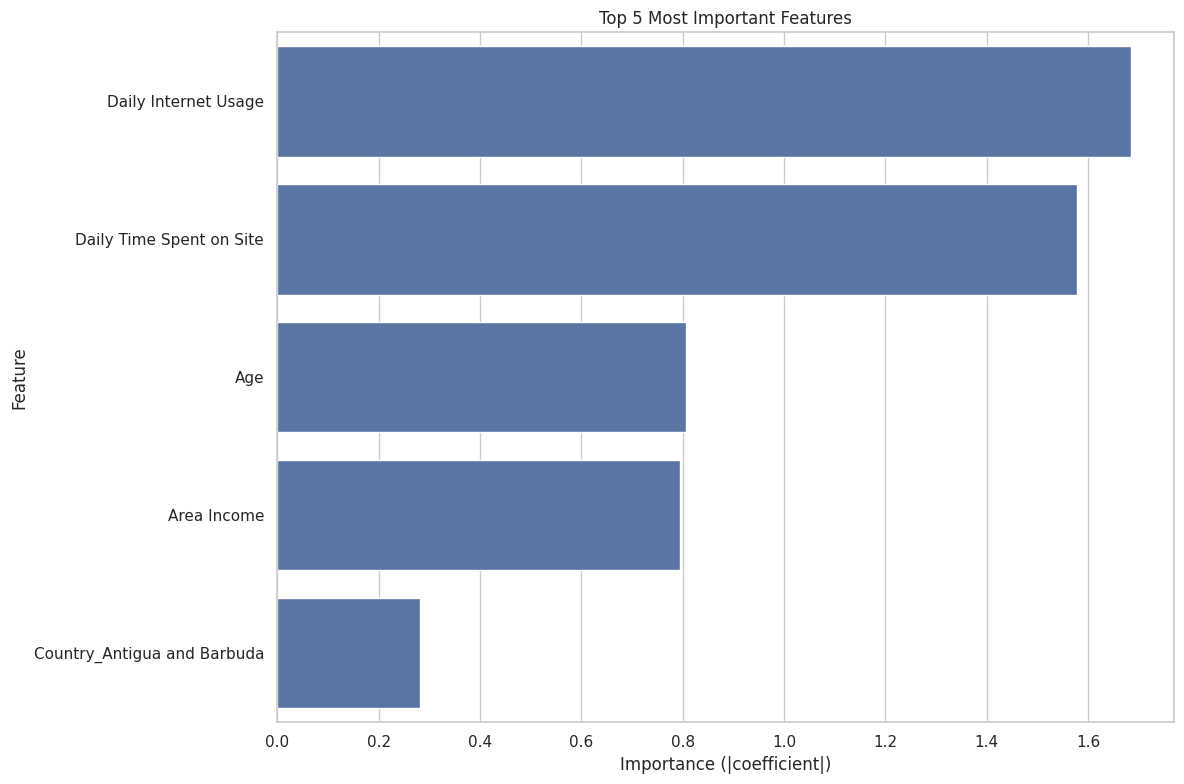

,Feature,Importance
3,Daily Internet Usage,1.685083
0,Daily Time Spent on Site,1.577755
1,Age,0.807433
2,Area Income,0.794662
975,Country_Antigua and Barbuda,0.282230
283,City_Jamesfurt,0.258156
133,City_Duffystad,0.253871
387,City_Lake Jessicaville,0.244650
659,City_Port Destiny,0.243420
177,City_East Ronald,0.225900


In [44]:
# Feature importance (absolute coefficient magnitude)
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': np.abs(lr_model.coef_[0])
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(5))
plt.title('Top 5 Most Important Features')
plt.xlabel('Importance (|coefficient|)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

feature_importance.head(10)


**TODO:** Share insights from the above chart
> *  Insights (short, human):

Daily Internet Usage and Daily Time Spent on Site have the largest (negative) impact: heavier usage/longer sessions → lower click odds (banner fatigue).

Age contributes positively: older users are more likely to click.

Area Income is negative: higher-income areas click less (use ethically—prefer contextual/time targeting over demographics).

Individual City/Country dummies are much smaller and often noisy; treat them as hypotheses until validated.

**TODO:** Why did we use Logistic regression? Was it a good decision?

> *  It’s interpretable (coefficients map to odds), fast, and strong on linearly separable problems.

Our metrics (high accuracy/F1 and ROC-AUC) show it’s performing very well here.

As a baseline, it’s ideal; we can later compare with tree models (e.g., Random Forest) to check for non-linear gains, but LR is already strong and easy to explain.

<h3 align = 'center' >
Thank you for completing the project!
</h3>

Please submit all materials to the NSDC HQ team at er3101@columbia.edu in order to receive a virtual certificate of completion. Do reach out to us if you have any questions or concerns. We are here to help you learn and grow.